<a href="https://colab.research.google.com/github/Matheusisa/AluraStore_Desafio/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


Nesta primeira análise, vou calcular o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento.
Tambem vou representar essa analise visualmente num grafico de barras.

In [2]:
#Nesta primeira análise,devemos calcular o faturamento total de cada loja. Somando os valores da coluna Preço de cada loja para estimar o faturamento.

faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f"Faturamento Loja 1: R${faturamento_loja1:,.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:,.2f}")

faturamentos = {
    "Loja 1": faturamento_loja1,
    "Loja 2": faturamento_loja2,
    "Loja 3": faturamento_loja3,
    "Loja 4": faturamento_loja4
}

loja_maior_faturamento = max(faturamentos, key=faturamentos.get)

print(f"A loja com o maior faturamento é: {loja_maior_faturamento}")

Faturamento Loja 1: R$1,534,509.12
Faturamento Loja 2: R$1,488,459.06
Faturamento Loja 3: R$1,464,025.03
Faturamento Loja 4: R$1,384,497.58
A loja com o maior faturamento é: Loja 1


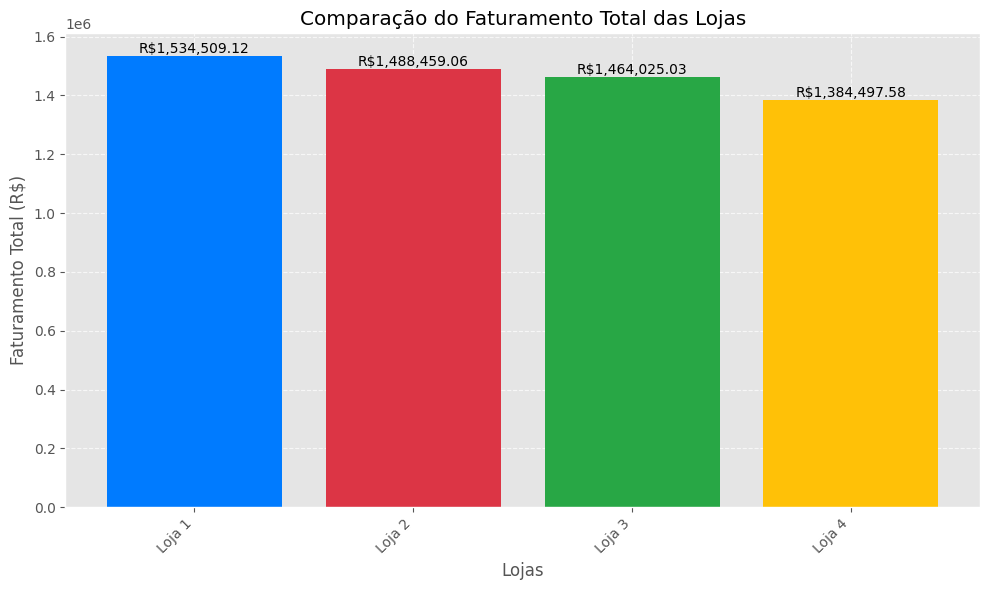

<Figure size 640x480 with 0 Axes>

In [3]:
# Comparação grafica de desempenho de cada loja

import pandas as pd
import matplotlib.pyplot as plt

faturamentos = {
    "Loja 1": faturamento_loja1,
    "Loja 2": faturamento_loja2,
    "Loja 3": faturamento_loja3,
    "Loja 4": faturamento_loja4
}

lojas = list(faturamentos.keys())
valores = list(faturamentos.values())

plt.style.use('ggplot')  # Aplicando um tema

plt.figure(figsize=(10, 6))
barras = plt.bar(lojas, valores, color=['#007bff', '#dc3545', '#28a745', '#ffc107'])
plt.xlabel("Lojas")
plt.ylabel("Faturamento Total (R$)")
plt.title("Comparação do Faturamento Total das Lojas")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)  # Adicionando grade

# Adicionando valores nas barras
for barra, valor in zip(barras, valores):
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() + 5,
             f'R${valor:,.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

# Salvando em alta resolução
plt.savefig('grafico_faturamento.png', dpi=300)


# 2. Vendas por Categoria


Neste passo, vou calcular a quantidade de produtos vendidos por categoria em cada loja. A ideia é agrupar os dados por categoria e contar o número de vendas de cada tipo, mostrando as categoria mais populares de cada loja

Quantidade de produtos vendidos por categoria:
 Categoria do Produto
brinquedos               1290
eletrodomesticos         1149
eletronicos              1772
esporte e lazer          1113
instrumentos musicais     753
livros                    742
moveis                   1886
utilidades domesticas     730
Name: Produto, dtype: int64

Categorias mais vendidas:
 Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: Produto, dtype: int64


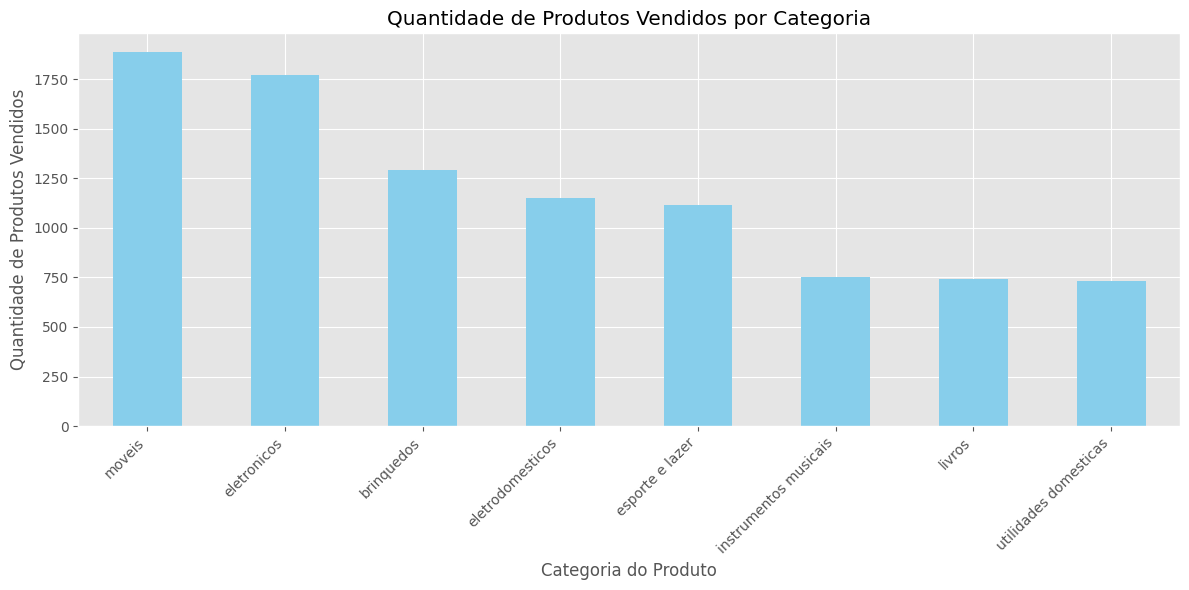

In [4]:
# agora nessa parte preciso calcular a quantidade de produtos vendidos por categoria, vamos procurar nas colunas "Produto" e "Categoria do Produto"
# fazendo uma "Análise da performance por tipo de produto." e tambem "Identificação de categorias mais vendidas."

# Concatenando os DataFrames das lojas
lojas = pd.concat([loja, loja2, loja3, loja4])

# Calculando a quantidade de produtos vendidos por categoria
vendas_por_categoria = lojas.groupby('Categoria do Produto')['Produto'].count()

# Imprimindo os resultados
print("Quantidade de produtos vendidos por categoria:\n", vendas_por_categoria)

# Identificando as categorias mais vendidas
categorias_mais_vendidas = vendas_por_categoria.sort_values(ascending=False)

print("\nCategorias mais vendidas:\n", categorias_mais_vendidas)

# Plotando um gráfico de barras para visualizar as categorias mais vendidas
plt.figure(figsize=(12, 6))
categorias_mais_vendidas.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Produtos Vendidos por Categoria')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Chama os dataframes da primeira celula

def encontrar_mais_vendidos(loja_df, nome_loja):
    """
    Encontra o produto e a categoria mais vendidos de uma loja.

    Args:
        loja_df: DataFrame da loja.
        nome_loja: Nome da loja.

    Returns:
        Uma tupla contendo o produto mais vendido e a categoria mais vendida.
    """
    # Agrupa por produto e conta as vendas
    vendas_por_produto = loja_df.groupby('Produto')['Categoria do Produto'].count()
    produto_mais_vendido = vendas_por_produto.idxmax()

    # Agrupa por categoria e conta as vendas
    vendas_por_categoria = loja_df.groupby('Categoria do Produto')['Categoria do Produto'].count()
    categoria_mais_vendida = vendas_por_categoria.idxmax()

    print(f"Loja {nome_loja}:")
    print(f"  Produto mais vendido: {produto_mais_vendido}")
    print(f"  Categoria mais vendida: {categoria_mais_vendida}")
    print("-" * 20)  # Separador visual

    return produto_mais_vendido, categoria_mais_vendida

# Chama a função para cada loja
encontrar_mais_vendidos(loja, "Loja 1")
encontrar_mais_vendidos(loja2, "Loja 2")
encontrar_mais_vendidos(loja3, "Loja 3")
encontrar_mais_vendidos(loja4, "Loja 4")


Loja Loja 1:
  Produto mais vendido: Guarda roupas
  Categoria mais vendida: moveis
--------------------
Loja Loja 2:
  Produto mais vendido: Iniciando em programação
  Categoria mais vendida: moveis
--------------------
Loja Loja 3:
  Produto mais vendido: Kit banquetas
  Categoria mais vendida: moveis
--------------------
Loja Loja 4:
  Produto mais vendido: Cama box
  Categoria mais vendida: moveis
--------------------


('Cama box', 'moveis')

# 3. Média de Avaliação das Lojas

Neste passo, vamos calcular a média das avaliações dos clientes para cada loja. O objetivo é entender a satisfação dos clientes com os produtos vendidos.


In [9]:
# Calculando a média de avaliações para cada loja
media_avaliacoes_loja1 = loja['Avaliação da compra'].mean()
media_avaliacoes_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacoes_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacoes_loja4 = loja4['Avaliação da compra'].mean()

print(f"Média de avaliações Loja 1: {media_avaliacoes_loja1:.2f}")
print(f"Média de avaliações Loja 2: {media_avaliacoes_loja2:.2f}")
print(f"Média de avaliações Loja 3: {media_avaliacoes_loja3:.2f}")
print(f"Média de avaliações Loja 4: {media_avaliacoes_loja4:.2f}")

# Criando um dicionário com as médias de avaliações
avaliacoes = {
    "Loja 1": media_avaliacoes_loja1,
    "Loja 2": media_avaliacoes_loja2,
    "Loja 3": media_avaliacoes_loja3,
    "Loja 4": media_avaliacoes_loja4
}

# Encontrando a loja com a maior média de avaliações
melhor_loja = max(avaliacoes, key=avaliacoes.get)
melhor_avaliacao = avaliacoes[melhor_loja]

print(f"\nA melhor loja em relação às avaliações é a {melhor_loja} com uma média de {melhor_avaliacao:.2f}")



Média de avaliações Loja 1: 3.98
Média de avaliações Loja 2: 4.04
Média de avaliações Loja 3: 4.05
Média de avaliações Loja 4: 4.00

A melhor loja em relação às avaliações é a Loja 3 com uma média de 4.05


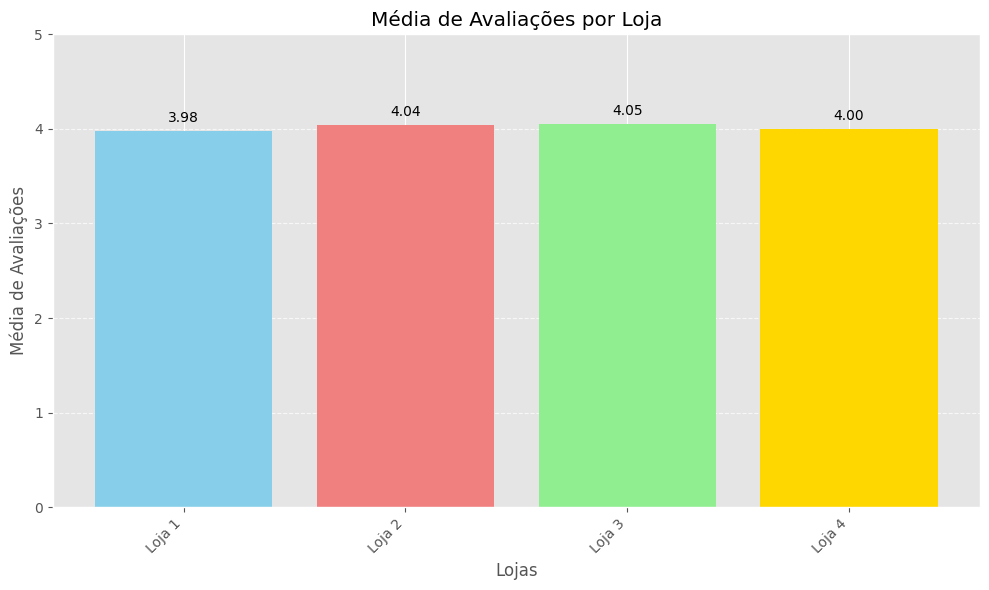

In [10]:

import matplotlib.pyplot as plt

# Dados das médias de avaliações (substitua pelos seus dados reais)
avaliacoes = {
    "Loja 1": media_avaliacoes_loja1,
    "Loja 2": media_avaliacoes_loja2,
    "Loja 3": media_avaliacoes_loja3,
    "Loja 4": media_avaliacoes_loja4
}

lojas = list(avaliacoes.keys())
medias = list(avaliacoes.values())

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(lojas, medias, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel("Lojas")
plt.ylabel("Média de Avaliações")
plt.title("Média de Avaliações por Loja")
plt.ylim(0, 5)  # Define o limite do eixo y de 0 a 5 (para avaliações)
plt.xticks(rotation=45, ha='right')

# Adicionando valores acima das barras
for i, v in enumerate(medias):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

Neste passo, deve identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja.  Ao final, visualize os resultados de forma que fique claro quais produtos se destacaram nas vendas de cada loja.



Loja Loja 1:
Produtos Mais Vendidos:
Produto
TV Led UHD 4K         60
Micro-ondas           60
Guarda roupas         60
Secadora de roupas    58
Blocos de montar      56
Name: Produto, dtype: int64

Produtos Menos Vendidos:
Produto
Celular ABXY                   33
Headset                        33
Panela de pressão              35
Pandeiro                       36
Ciência de dados com python    39
Name: Produto, dtype: int64


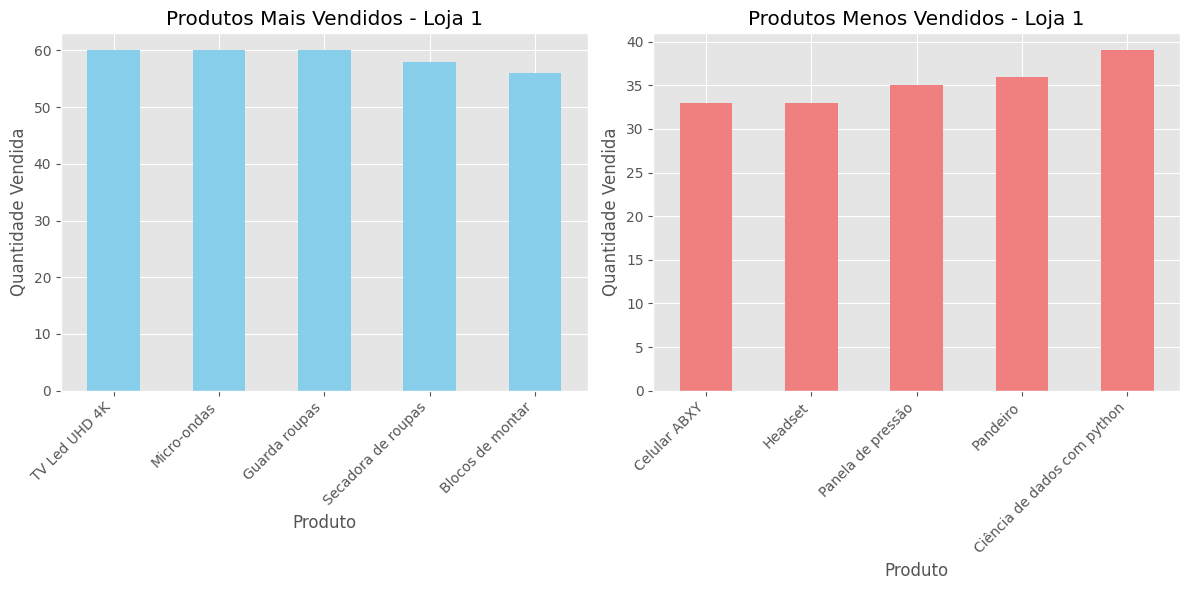


Loja Loja 2:
Produtos Mais Vendidos:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: Produto, dtype: int64

Produtos Menos Vendidos:
Produto
Jogo de tabuleiro    32
Impressora           34
Mesa de jantar       34
Poltrona             35
Fone de ouvido       37
Name: Produto, dtype: int64


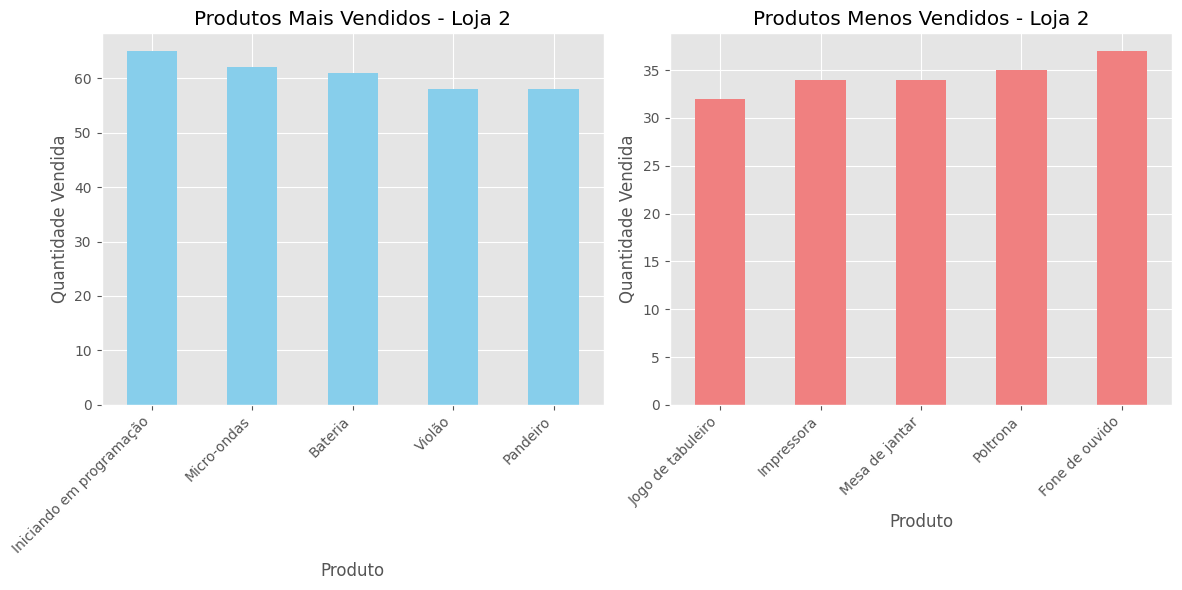


Loja Loja 3:
Produtos Mais Vendidos:
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Cômoda             55
Jogo de panelas    55
Name: Produto, dtype: int64

Produtos Menos Vendidos:
Produto
Blocos de montar    35
Jogo de copos       36
Micro-ondas         36
Mochila             36
Guitarra            38
Name: Produto, dtype: int64


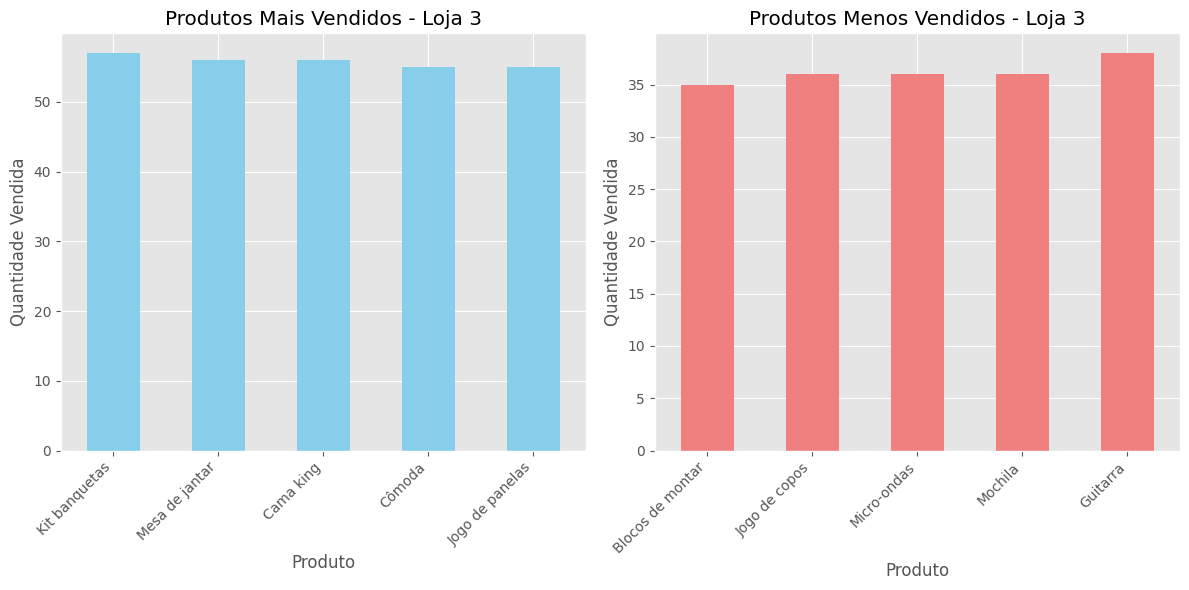


Loja Loja 4:
Produtos Mais Vendidos:
Produto
Cama box                   62
Faqueiro                   59
Cama king                  56
Dashboards com Power BI    56
Cômoda                     55
Name: Produto, dtype: int64

Produtos Menos Vendidos:
Produto
Guitarra                       33
Guarda roupas                  34
Violão                         37
Ciência de dados com python    38
Lavadora de roupas             38
Name: Produto, dtype: int64


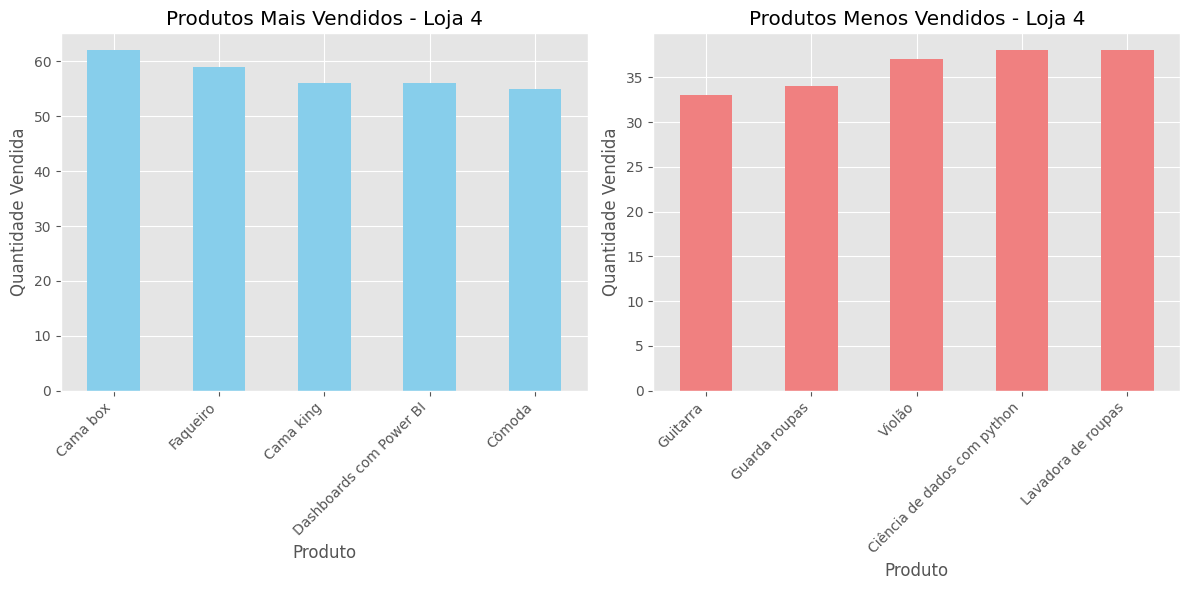

In [11]:
# prompt: Neste passo, deve identificar quais produtos foram os mais vendidos e os menos vendidos em cada loja. Ao final, visualize os resultados de forma que fique claro quais produtos se destacaram nas vendas de cada loja. Vamos usar as colunas "Produto"

def encontrar_mais_e_menos_vendidos(loja_df, nome_loja):
    """
    Encontra os produtos mais e menos vendidos de uma loja.

    Args:
        loja_df: DataFrame da loja.
        nome_loja: Nome da loja.
    """
    vendas_por_produto = loja_df.groupby('Produto')['Produto'].count()
    produtos_mais_vendidos = vendas_por_produto.sort_values(ascending=False).head(5)
    produtos_menos_vendidos = vendas_por_produto.sort_values().head(5)

    print(f"\nLoja {nome_loja}:")
    print("Produtos Mais Vendidos:")
    print(produtos_mais_vendidos)
    print("\nProdutos Menos Vendidos:")
    print(produtos_menos_vendidos)

    # Plotagem dos gráficos
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    produtos_mais_vendidos.plot(kind='bar', color='skyblue')
    plt.title(f'Produtos Mais Vendidos - {nome_loja}')
    plt.xlabel('Produto')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    produtos_menos_vendidos.plot(kind='bar', color='lightcoral')
    plt.title(f'Produtos Menos Vendidos - {nome_loja}')
    plt.xlabel('Produto')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


# Chama a função para cada loja
encontrar_mais_e_menos_vendidos(loja, "Loja 1")
encontrar_mais_e_menos_vendidos(loja2, "Loja 2")
encontrar_mais_e_menos_vendidos(loja3, "Loja 3")
encontrar_mais_e_menos_vendidos(loja4, "Loja 4")


# 5. Frete Médio por Loja
